In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
main_path = '/content/drive/MyDrive/Colab Notebooks/Prodigy_ML'

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
os.chdir(main_path)

In [ ]:
!kaggle datasets download vjchoudhary7/customer-segmentation


403 - Forbidden - Permission 'datasets.get' was denied


In [ ]:
data = pd.read_csv('Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


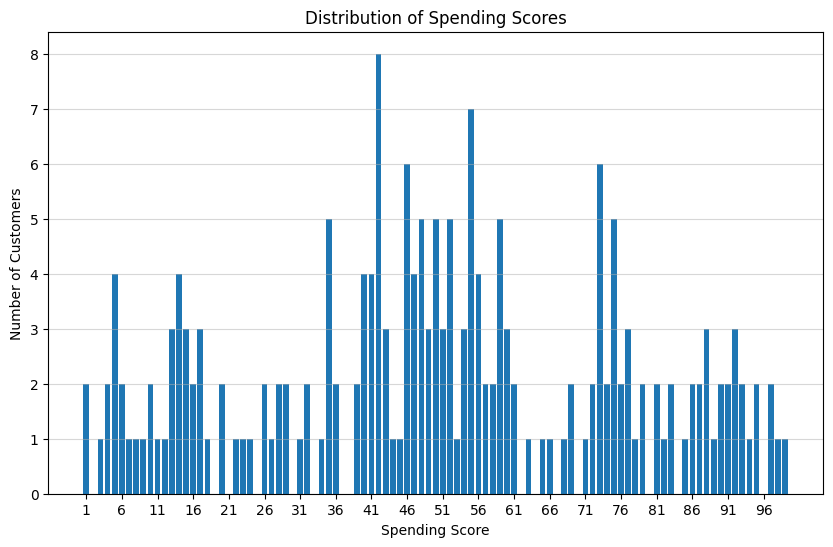

In [ ]:
# distribution of Spending Scores
spending_counts = data['Spending Score (1-100)'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(spending_counts.index, spending_counts.values)
plt.xlabel('Spending Score')
plt.ylabel('Number of Customers')
plt.title('Distribution of Spending Scores')
plt.xticks(range(1, 101, 5))
plt.grid(axis='y', alpha=0.5)
plt.show()

In [ ]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

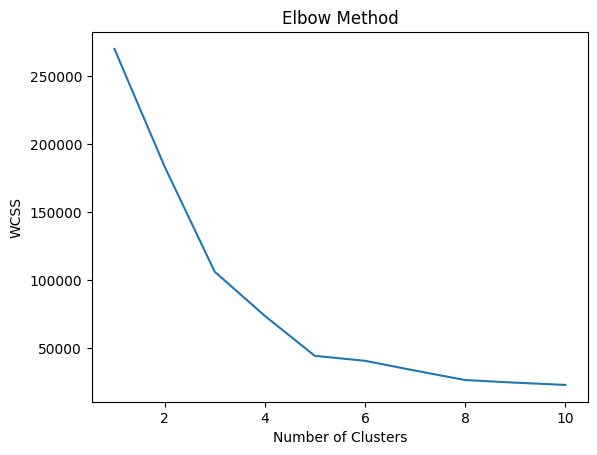

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

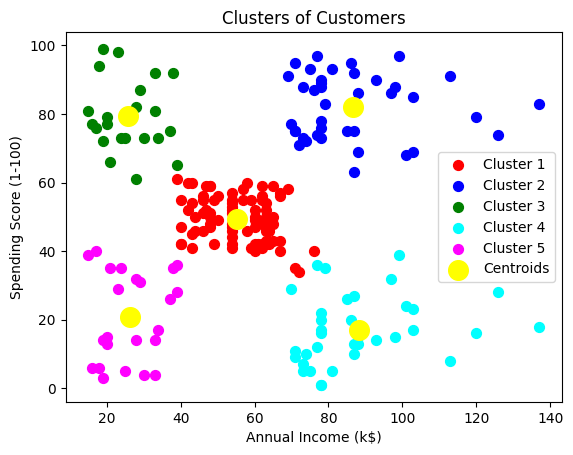

In [ ]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s=50, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()